# Dataset1: Temperature data for 2017
Objective: Calculate the average daily temperature

In [136]:
''' Get data and save as pandas dataframe'''
import pandas as pd
df = pd.read_csv('data/temperature_data_2017.txt')

In [137]:
df.head()

,station,valid,tmpc
0,LFAT,2017-01-01 00:00,-1.0
1,LFAT,2017-01-01 00:30,-2.0
2,LFAT,2017-01-01 01:00,-2.0
3,LFAT,2017-01-01 01:30,-2.0
4,LFAT,2017-01-01 02:00,-2.0


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17169 entries, 0 to 17168
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  17169 non-null  object 
 1   valid    17169 non-null  object 
 2   tmpc     17169 non-null  float64
dtypes: float64(1), object(2)
memory usage: 402.5+ KB


In [139]:
df.describe()

,tmpc
count,17169.000000
mean,11.675403
std,6.030773
min,-6.000000
25%,8.000000
50%,12.000000
75%,16.000000
max,34.000000


In [140]:
df.isna().sum()

station    0
valid      0
tmpc       0
dtype: int64

In [141]:
''' Convert datatype to datetime '''
df['valid'] = pd.to_datetime(df['valid'])

In [142]:
''' Extract only dates from the data '''
df['Date'] = df['valid'].dt.date

In [143]:
df.head()

,station,valid,tmpc,Date
0,LFAT,2017-01-01 00:00:00,-1.0,2017-01-01
1,LFAT,2017-01-01 00:30:00,-2.0,2017-01-01
2,LFAT,2017-01-01 01:00:00,-2.0,2017-01-01
3,LFAT,2017-01-01 01:30:00,-2.0,2017-01-01
4,LFAT,2017-01-01 02:00:00,-2.0,2017-01-01


In [144]:
''' Convert datatype to datetime '''
df['Date'] = pd.to_datetime(df['Date'])

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17169 entries, 0 to 17168
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  17169 non-null  object        
 1   valid    17169 non-null  datetime64[ns]
 2   tmpc     17169 non-null  float64       
 3   Date     17169 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 536.7+ KB


In [146]:
''' Check for suspicious values '''
df['tmpc'].unique() # The data seems good, no weird values

array([-1., -2., -3.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., -4.,
        9., 10., 11., 12., -5., -6., 13., 14., 15., 16., 17., 18., 19.,
       20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34.])

In [147]:
''' Insert new columns for day and month '''
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df

,station,valid,tmpc,Date,month,day
0,LFAT,2017-01-01 00:00:00,-1.0,2017-01-01,1,1
1,LFAT,2017-01-01 00:30:00,-2.0,2017-01-01,1,1
2,LFAT,2017-01-01 01:00:00,-2.0,2017-01-01,1,1
3,LFAT,2017-01-01 01:30:00,-2.0,2017-01-01,1,1
4,LFAT,2017-01-01 02:00:00,-2.0,2017-01-01,1,1
...,...,...,...,...,...,...
17164,LFAT,2017-12-30 21:30:00,10.0,2017-12-30,12,30
17165,LFAT,2017-12-30 22:00:00,10.0,2017-12-30,12,30
17166,LFAT,2017-12-30 22:30:00,11.0,2017-12-30,12,30
17167,LFAT,2017-12-30 23:00:00,12.0,2017-12-30,12,30


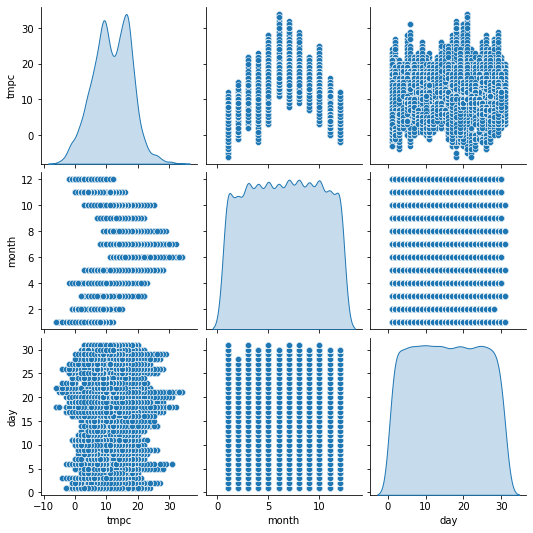

In [148]:
import seaborn as sns
sns.pairplot(data=df, diag_kind='kde')

In [149]:
''' Get the average daily temperature '''
df_avg_2017 = df.groupby([df['month'], df['day']]).mean()
df_avg_2017

tmpc
month day           
1     1     0.086957
      2     2.895833
      3     2.312500
      4     5.914894
      5     2.895833
...              ...
12    26    7.166667
      27    5.520833
      28    4.645833
      29    5.958333
      30   10.604167

[364 rows x 1 columns]

In [150]:
df_avg_2017.to_csv('Average_temp_2017.csv')

# Dataset 2: Temperature data for 2013-2016
Objective: Calculate the average daily temperature

The stations used for getting the historical temperature data:

LFSO: Nancy
LFRV: Vannes
LFBT: Tarbes
LFAT: Le Tourquet
LFBA: Agen
LFBD: Bordeaux
LFBH: La Rochelle
LFKJ: Ajaccio
LFPV: Villavoublay
LFPB: Paris
LFPO: Paris
LFQG: Nevers
LFSD: Dijon
LFRM: Le Mans
LFBO: Toulouse
LFBL: Limoges
LFMV: Avignon
LFLY: Lyon

In [151]:
# Define relative path to folder containing the text files
import os, glob
import pandas as pd
files_folder = "data/new_data_grid"
files = []

# Create a dataframe list by using a list comprehension
files = [pd.read_csv(file, delimiter=',') for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
#print(files)

# Concatenate the list of DataFrames into one
files_df = pd.concat(files)
files_df.head()

,station,valid,tmpc
0,LFBH,2006-04-02 23:30,10.00
1,LFBH,2007-03-11 23:30,7.00
2,LFBH,2009-03-08 23:30,8.00
3,LFBH,2010-01-01 00:00,8.00
4,LFBH,2010-01-01 00:30,8.00


In [152]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640398 entries, 0 to 116705
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   station  1640398 non-null  object
 1   valid    1640398 non-null  object
 2   tmpc     1640398 non-null  object
dtypes: object(3)
memory usage: 50.1+ MB


In [153]:
''' Convert datatype to datetime '''
files_df['valid'] = pd.to_datetime(files_df['valid'])

In [154]:
''' Get only the date from data'''
files_df['Date'] = files_df['valid'].dt.date

In [155]:
''' Convert datatype to datetime '''
files_df['Date'] = pd.to_datetime(files_df['Date'])

In [156]:
''' Check for suspicious values; M is used for missing values '''
files_df['tmpc'].unique()

array(['10.00', '7.00', '8.00', '6.00', '5.00', '4.00', '3.00', '2.00',
       '1.00', '0.00', '-1.00', '-2.00', '-3.00', '-4.00', '-5.00',
       '-6.00', '9.00', '11.00', '12.00', '13.00', '14.00', '15.00',
       '16.00', '17.00', '18.00', '19.00', '20.00', '21.00', '22.00',
       '23.00', '24.00', '25.00', '26.00', '27.00', '28.00', '29.00',
       '30.00', '32.00', '31.00', '33.00', '34.00', '35.00', '-7.00',
       '-8.00', '36.00', 'M', '37.00', '-9.00', '-10.00', '-11.00',
       '-12.00', '38.00', '39.00', '40.00', '-13.00', '-14.00', '-15.00',
       '-16.00', '-17.00', '-19.00', '-20.00', '-21.00', '-18.00'],
      dtype=object)

In [157]:
''' Find the number of missing data '''
files_df['tmpc'].value_counts()['M']

1755

In [158]:
''' Convert them to null/NaN if needed or directly delete them '''
files_df = files_df[files_df.tmpc != 'M']

In [159]:
files_df['tmpc'].unique()

array(['10.00', '7.00', '8.00', '6.00', '5.00', '4.00', '3.00', '2.00',
       '1.00', '0.00', '-1.00', '-2.00', '-3.00', '-4.00', '-5.00',
       '-6.00', '9.00', '11.00', '12.00', '13.00', '14.00', '15.00',
       '16.00', '17.00', '18.00', '19.00', '20.00', '21.00', '22.00',
       '23.00', '24.00', '25.00', '26.00', '27.00', '28.00', '29.00',
       '30.00', '32.00', '31.00', '33.00', '34.00', '35.00', '-7.00',
       '-8.00', '36.00', '37.00', '-9.00', '-10.00', '-11.00', '-12.00',
       '38.00', '39.00', '40.00', '-13.00', '-14.00', '-15.00', '-16.00',
       '-17.00', '-19.00', '-20.00', '-21.00', '-18.00'], dtype=object)

In [160]:
''' Convert temperature data to float '''
files_df['tmpc'] = files_df['tmpc'].astype('float')

In [161]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638643 entries, 0 to 116705
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   station  1638643 non-null  object        
 1   valid    1638643 non-null  datetime64[ns]
 2   tmpc     1638643 non-null  float64       
 3   Date     1638643 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 62.5+ MB


In [162]:
files_df.describe()

,tmpc
count,1.638643e+06
mean,1.263362e+01
std,7.473890e+00
min,-2.100000e+01
25%,7.000000e+00
50%,1.200000e+01
75%,1.800000e+01
max,4.000000e+01


In [163]:
files_df.isna().sum()

station    0
valid      0
tmpc       0
Date       0
dtype: int64

In [164]:
''' Insert seperate column for day and month '''
files_df['month'] = files_df['Date'].dt.month
files_df['day'] = files_df['Date'].dt.day
files_df

,station,valid,tmpc,Date,month,day
0,LFBH,2006-04-02 23:30:00,10.0,2006-04-02,4,2
1,LFBH,2007-03-11 23:30:00,7.0,2007-03-11,3,11
2,LFBH,2009-03-08 23:30:00,8.0,2009-03-08,3,8
3,LFBH,2010-01-01 00:00:00,8.0,2010-01-01,1,1
4,LFBH,2010-01-01 00:30:00,8.0,2010-01-01,1,1
...,...,...,...,...,...,...
116701,LFSO,2016-12-30 21:30:00,-4.0,2016-12-30,12,30
116702,LFSO,2016-12-30 22:00:00,-5.0,2016-12-30,12,30
116703,LFSO,2016-12-30 22:30:00,-5.0,2016-12-30,12,30
116704,LFSO,2016-12-30 23:00:00,-5.0,2016-12-30,12,30


In [165]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638643 entries, 0 to 116705
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   station  1638643 non-null  object        
 1   valid    1638643 non-null  datetime64[ns]
 2   tmpc     1638643 non-null  float64       
 3   Date     1638643 non-null  datetime64[ns]
 4   month    1638643 non-null  int64         
 5   day      1638643 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 87.5+ MB


In [166]:
''' Get average daily temperature '''
df1_avg_past = files_df.groupby([files_df['month'], files_df['day']]).mean()
df1_avg_past

tmpc
month day          
1     1    6.094742
      2    5.930138
      3    6.122764
      4    5.963877
      5    5.203153
...             ...
12    27   5.890625
      28   5.511792
      29   4.907018
      30   4.791777
      31   6.289239

[366 rows x 1 columns]

In [167]:
df1_avg_past.to_csv('Average_temp_10_years.csv')

# Calculate the temperature deviation between 2017 and past data

In [168]:
''' Get the average daily temperature of 2017 and past years in one dataframe '''
avgg = pd.merge(df1_avg_past, df_avg_2017, how = 'outer', on = ['month', 'day'])#, indicator = 'True')
avgg

tmpc_x     tmpc_y
month day                     
1     1    6.094742   0.086957
      2    5.930138   2.895833
      3    6.122764   2.312500
      4    5.963877   5.914894
      5    5.203153   2.895833
...             ...        ...
12    27   5.890625   5.520833
      28   5.511792   4.645833
      29   4.907018   5.958333
      30   4.791777  10.604167
      31   6.289239        NaN

[366 rows x 2 columns]

In [169]:
avgg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 366 entries, (1, 1) to (12, 31)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc_x  366 non-null    float64
 1   tmpc_y  364 non-null    float64
dtypes: float64(2)
memory usage: 8.2 KB


In [170]:
''' Calculate the deviation by performing a subtraction '''
avgg['temp_deviation'] = avgg['tmpc_y'] - avgg['tmpc_x']
avgg

tmpc_x     tmpc_y  temp_deviation
month day                                     
1     1    6.094742   0.086957       -6.007785
      2    5.930138   2.895833       -3.034305
      3    6.122764   2.312500       -3.810264
      4    5.963877   5.914894       -0.048984
      5    5.203153   2.895833       -2.307320
...             ...        ...             ...
12    27   5.890625   5.520833       -0.369792
      28   5.511792   4.645833       -0.865959
      29   4.907018   5.958333        1.051316
      30   4.791777  10.604167        5.812389
      31   6.289239        NaN             NaN

[366 rows x 3 columns]

In [171]:
''' Rename columns for clarity '''
avgg.rename(columns = {'tmpc_x':'tmpc_past', 'tmpc_y':'tmpc_2017'}, inplace = True)
avgg

tmpc_past  tmpc_2017  temp_deviation
month day                                      
1     1     6.094742   0.086957       -6.007785
      2     5.930138   2.895833       -3.034305
      3     6.122764   2.312500       -3.810264
      4     5.963877   5.914894       -0.048984
      5     5.203153   2.895833       -2.307320
...              ...        ...             ...
12    27    5.890625   5.520833       -0.369792
      28    5.511792   4.645833       -0.865959
      29    4.907018   5.958333        1.051316
      30    4.791777  10.604167        5.812389
      31    6.289239        NaN             NaN

[366 rows x 3 columns]

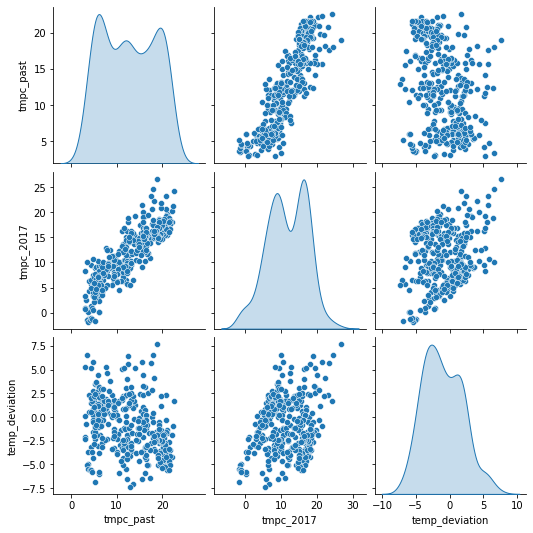

In [172]:
import seaborn as sns
sns.pairplot(data=avgg, diag_kind='kde')


In [173]:
avgg.to_csv('temperature_deviation.csv')

# Dataset 3: Electricity consumption deviation data from Office
Objective: Calculate the average daily consumption deviation

In [174]:
''' Consumption data as provided by the company '''
df2 = pd.read_csv('data/Consumption_deviation_2017.csv', sep = ';')
df2.head()

,timestamp (UTC),MW
0,01.01.2017 00:00,35
1,01.01.2017 00:30,-8
2,01.01.2017 01:00,31
3,01.01.2017 01:30,58
4,01.01.2017 02:00,-21


In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17445 entries, 0 to 17444
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp (UTC)  17445 non-null  object
 1   MW               17445 non-null  object
dtypes: object(2)
memory usage: 272.7+ KB


In [176]:
''' Convert datatype to datetime '''
df2['timestamp (UTC)'] = pd.to_datetime(df2['timestamp (UTC)'])

In [177]:
''' Extract only date from data '''
df2['Date'] = df2['timestamp (UTC)'].dt.date

In [178]:
''' Convert datatype to datetime '''
df2['Date'] = pd.to_datetime(df2['Date'])

In [179]:
df2.head()

,timestamp (UTC),MW,Date
0,2017-01-01 00:00:00,35,2017-01-01
1,2017-01-01 00:30:00,-8,2017-01-01
2,2017-01-01 01:00:00,31,2017-01-01
3,2017-01-01 01:30:00,58,2017-01-01
4,2017-01-01 02:00:00,-21,2017-01-01


In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17445 entries, 0 to 17444
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp (UTC)  17445 non-null  datetime64[ns]
 1   MW               17445 non-null  object        
 2   Date             17445 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 409.0+ KB


In [181]:
df2.isna().sum()

timestamp (UTC)    0
MW                 0
Date               0
dtype: int64

In [182]:
'''Check for suspicious values ''' 
df2['MW'].unique() # Two abnormal values: -1966610 and #WERT!

array(['35', '-8', '31', '58', '-21', '-85', '74', '-86', '-127', '-22',
       '-109', '55', '-74', '80', '-102', '60', '-23', '16', '20', '110',
       '71', '5', '87', '89', '-54', '-105', '4', '88', '-15', '97',
       '-126', '-65', '-37', '41', '-90', '108', '-73', '-9', '63', '94',
       '-128', '33', '28', '102', '2', '-52', '59', '78', '68', '98',
       '-24', '93', '-133', '-72', '19', '-53', '49', '18', '99', '-75',
       '61', '-25', '-12', '12', '-28', '-29', '84', '-35', '90', '-42',
       '-46', '85', '-16', '54', '-17', '-114', '-98', '-125', '-38',
       '-68', '-11', '-47', '32', '-117', '133', '-41', '-97', '6', '-30',
       '40', '37', '103', '112', '107', '127', '-89', '11', '132', '-81',
       '-39', '-63', '70', '111', '-79', '-31', '131', '81', '50', '119',
       '-122', '-76', '8', '9', '-45', '-132', '57', '-116', '14', '39',
       '76', '-66', '-7', '83', '-84', '30', '-121', '-1', '122', '129',
       '7', '21', '-13', '-20', '72', '-78', '-33', '-6

In [183]:
''' Convert both to NaN so the calculations are not affected '''
import numpy as np
df2['MW'] = df2['MW'].replace({'-1966610': np.nan})
df2['MW'] = df2['MW'].replace({'#WERT!': np.nan})

In [184]:
df2['MW'].unique() 

array(['35', '-8', '31', '58', '-21', '-85', '74', '-86', '-127', '-22',
       '-109', '55', '-74', '80', '-102', '60', '-23', '16', '20', '110',
       '71', '5', '87', '89', '-54', '-105', '4', '88', '-15', '97',
       '-126', '-65', '-37', '41', '-90', '108', '-73', '-9', '63', '94',
       '-128', '33', '28', '102', '2', '-52', '59', '78', '68', '98',
       '-24', '93', '-133', '-72', '19', '-53', '49', '18', '99', '-75',
       '61', '-25', '-12', '12', '-28', '-29', '84', '-35', '90', '-42',
       '-46', '85', '-16', '54', '-17', '-114', '-98', '-125', '-38',
       '-68', '-11', '-47', '32', '-117', '133', '-41', '-97', '6', '-30',
       '40', '37', '103', '112', '107', '127', '-89', '11', '132', '-81',
       '-39', '-63', '70', '111', '-79', '-31', '131', '81', '50', '119',
       '-122', '-76', '8', '9', '-45', '-132', '57', '-116', '14', '39',
       '76', '-66', '-7', '83', '-84', '30', '-121', '-1', '122', '129',
       '7', '21', '-13', '-20', '72', '-78', '-33', '-6

In [185]:
''' Convert datatype to int to be able to perform calculations '''
df2['MW'] = df2['MW'].astype('float')
df2['MW'] = df2['MW'].astype('Int64')

In [186]:
''' Extract day and month from the data '''
df2['month'] = df2['Date'].dt.month
df2['day'] = df2['Date'].dt.day
df2

,timestamp (UTC),MW,Date,month,day
0,2017-01-01 00:00:00,35,2017-01-01,1,1
1,2017-01-01 00:30:00,-8,2017-01-01,1,1
2,2017-01-01 01:00:00,31,2017-01-01,1,1
3,2017-01-01 01:30:00,58,2017-01-01,1,1
4,2017-01-01 02:00:00,-21,2017-01-01,1,1
...,...,...,...,...,...
17440,2017-12-30 22:00:00,-93,2017-12-30,12,30
17441,2017-12-30 22:30:00,-44,2017-12-30,12,30
17442,2017-12-30 23:00:00,-61,2017-12-30,12,30
17443,2017-12-30 23:30:00,122,2017-12-30,12,30


In [187]:
''' Get the average daily consumption deviation '''
df2_avg_consump = df2.groupby([df2['month'], df2['day']]).mean()
df2_avg_consump

MW
month day           
1     1       2.0625
      2    67.854167
      3   -29.041667
      4    24.704545
      5    21.729167
...              ...
12    27       -73.0
      28  -32.541667
      29    4.583333
      30  -29.958333
      31       -11.0

[365 rows x 1 columns]

In [188]:
df2_avg_consump.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 365 entries, (1, 1) to (12, 31)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MW      365 non-null    Float64
dtypes: Float64(1)
memory usage: 4.4 KB


In [189]:
''' Merge the table with average temperature (2017 and past), average temperature deviation and average consumption deiation'''
final = pd.merge(avgg, df2_avg_consump, how = 'outer', on = ['month', 'day'])
final

tmpc_past  tmpc_2017  temp_deviation         MW
month day                                                 
1     1     6.094742   0.086957       -6.007785     2.0625
      2     5.930138   2.895833       -3.034305  67.854167
      3     6.122764   2.312500       -3.810264 -29.041667
      4     5.963877   5.914894       -0.048984  24.704545
      5     5.203153   2.895833       -2.307320  21.729167
...              ...        ...             ...        ...
12    27    5.890625   5.520833       -0.369792      -73.0
      28    5.511792   4.645833       -0.865959 -32.541667
      29    4.907018   5.958333        1.051316   4.583333
      30    4.791777  10.604167        5.812389 -29.958333
      31    6.289239        NaN             NaN      -11.0

[366 rows x 4 columns]

In [190]:
''' Data with temperature and consumption deviation '''
final.to_csv('deviation_data.csv')

In [191]:
final.info() # Remove null values 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 366 entries, (1, 1) to (12, 31)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmpc_past       366 non-null    float64
 1   tmpc_2017       364 non-null    float64
 2   temp_deviation  364 non-null    float64
 3   MW              365 non-null    Float64
dtypes: Float64(1), float64(3)
memory usage: 14.3 KB


In [192]:
''' Remove null values '''
final_without_NaN = final.dropna()
final_without_NaN

tmpc_past  tmpc_2017  temp_deviation         MW
month day                                                 
1     1     6.094742   0.086957       -6.007785     2.0625
      2     5.930138   2.895833       -3.034305  67.854167
      3     6.122764   2.312500       -3.810264 -29.041667
      4     5.963877   5.914894       -0.048984  24.704545
      5     5.203153   2.895833       -2.307320  21.729167
...              ...        ...             ...        ...
12    26    5.970844   7.166667        1.195823 -36.104167
      27    5.890625   5.520833       -0.369792      -73.0
      28    5.511792   4.645833       -0.865959 -32.541667
      29    4.907018   5.958333        1.051316   4.583333
      30    4.791777  10.604167        5.812389 -29.958333

[364 rows x 4 columns]

In [193]:
final_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 364 entries, (1, 1) to (12, 30)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmpc_past       364 non-null    float64
 1   tmpc_2017       364 non-null    float64
 2   temp_deviation  364 non-null    float64
 3   MW              364 non-null    Float64
dtypes: Float64(1), float64(3)
memory usage: 14.2 KB


# Summer and winter tables 

In [194]:
data = pd.read_csv('deviation_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           366 non-null    int64  
 1   day             366 non-null    int64  
 2   tmpc_past       366 non-null    float64
 3   tmpc_2017       364 non-null    float64
 4   temp_deviation  364 non-null    float64
 5   MW              365 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 17.3 KB


In [195]:
data

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.094742,0.086957,-6.007785,2.062500
1,1,2,5.930138,2.895833,-3.034305,67.854167
2,1,3,6.122764,2.312500,-3.810264,-29.041667
3,1,4,5.963877,5.914894,-0.048984,24.704545
4,1,5,5.203153,2.895833,-2.307320,21.729167
...,...,...,...,...,...,...
361,12,27,5.890625,5.520833,-0.369792,-73.000000
362,12,28,5.511792,4.645833,-0.865959,-32.541667
363,12,29,4.907018,5.958333,1.051316,4.583333
364,12,30,4.791777,10.604167,5.812389,-29.958333


month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tmpc_past, dtype: object

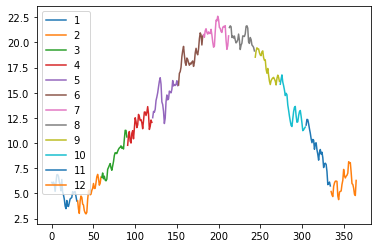

In [196]:
''' Plot of the past temperature based on which the summer and winter months are decided '''
data.groupby('month')['tmpc_past'].plot(legend=True)

Split summer and winter according to index

In [197]:
''' Check for splitting the table into summer (May to Oct) and winter (Nov to Apr)'''
data.loc[274] # 91 (1st apr) 244 (1st Sept) 274 (1st Oct)  [91+30:273+31 = summer and 274+31:90+31 = winter]

month             10.000000
day                1.000000
tmpc_past         15.844648
tmpc_2017         15.437500
temp_deviation    -0.407148
MW                -1.500000
Name: 274, dtype: float64

In [198]:
''' Splitting the summer table by indexing '''
summer_table = data[91+30:273+31]
summer_table

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
121,5,1,12.521560,9.304348,-3.217212,-18.562500
122,5,2,13.145253,9.791667,-3.353586,12.937500
123,5,3,13.057383,9.978723,-3.078659,-49.833333
124,5,4,13.350897,11.702128,-1.648770,35.583333
125,5,5,14.225310,10.437500,-3.787810,-0.416667
...,...,...,...,...,...,...
299,10,26,12.671723,15.083333,2.411610,0.458333
300,10,27,11.988347,11.479167,-0.509180,8.500000
301,10,28,11.235744,13.270833,2.035089,13.041667
302,10,29,11.320312,12.145833,0.825521,31.960000


In [199]:
''' Splitting the winetr table by indexing '''
winter1 = data[0:90+31]
winter1

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.094742,0.086957,-6.007785,2.062500
1,1,2,5.930138,2.895833,-3.034305,67.854167
2,1,3,6.122764,2.312500,-3.810264,-29.041667
3,1,4,5.963877,5.914894,-0.048984,24.704545
4,1,5,5.203153,2.895833,-2.307320,21.729167
...,...,...,...,...,...,...
116,4,26,12.888618,5.520833,-7.367785,-14.854167
117,4,27,11.354861,7.000000,-4.354861,-19.375000
118,4,28,11.654310,8.604167,-3.050143,-17.604167
119,4,29,12.289918,9.937500,-2.352418,2.208333


In [200]:
''' Splitting the winetr table by indexing '''
winter2 = data[274+31:366]
winter2

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
305,11,1,11.784392,9.312500,-2.471892,0.145833
306,11,2,12.358486,7.916667,-4.441820,-37.312500
307,11,3,12.317995,8.375000,-3.942995,28.937500
308,11,4,11.909751,12.739130,0.829379,47.416667
309,11,5,11.417719,9.020833,-2.396885,-5.375000
...,...,...,...,...,...,...
361,12,27,5.890625,5.520833,-0.369792,-73.000000
362,12,28,5.511792,4.645833,-0.865959,-32.541667
363,12,29,4.907018,5.958333,1.051316,4.583333
364,12,30,4.791777,10.604167,5.812389,-29.958333


In [201]:
''' Merge the winetr table by concatenating '''
f = [winter1, winter2]
winter_table = pd.concat(f)
winter_table

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.094742,0.086957,-6.007785,2.062500
1,1,2,5.930138,2.895833,-3.034305,67.854167
2,1,3,6.122764,2.312500,-3.810264,-29.041667
3,1,4,5.963877,5.914894,-0.048984,24.704545
4,1,5,5.203153,2.895833,-2.307320,21.729167
...,...,...,...,...,...,...
361,12,27,5.890625,5.520833,-0.369792,-73.000000
362,12,28,5.511792,4.645833,-0.865959,-32.541667
363,12,29,4.907018,5.958333,1.051316,4.583333
364,12,30,4.791777,10.604167,5.812389,-29.958333


# Probability for the whole year
Logistic Regression used for calculation of probabilities

In [202]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [203]:
final_without_NaN

tmpc_past  tmpc_2017  temp_deviation         MW
month day                                                 
1     1     6.094742   0.086957       -6.007785     2.0625
      2     5.930138   2.895833       -3.034305  67.854167
      3     6.122764   2.312500       -3.810264 -29.041667
      4     5.963877   5.914894       -0.048984  24.704545
      5     5.203153   2.895833       -2.307320  21.729167
...              ...        ...             ...        ...
12    26    5.970844   7.166667        1.195823 -36.104167
      27    5.890625   5.520833       -0.369792      -73.0
      28    5.511792   4.645833       -0.865959 -32.541667
      29    4.907018   5.958333        1.051316   4.583333
      30    4.791777  10.604167        5.812389 -29.958333

[364 rows x 4 columns]

# We need the target variables to be in binary form

In [204]:
final_without_NaN['y'] = np.where(final_without_NaN['MW'] > 0, 1, 0) 
final_without_NaN.head()

<ipython-input-204-0207a910222f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['y'] = np.where(final_without_NaN['MW'] > 0, 1, 0)


tmpc_past  tmpc_2017  temp_deviation         MW  y
month day                                                    
1     1     6.094742   0.086957       -6.007785     2.0625  1
      2     5.930138   2.895833       -3.034305  67.854167  1
      3     6.122764   2.312500       -3.810264 -29.041667  0
      4     5.963877   5.914894       -0.048984  24.704545  1
      5     5.203153   2.895833       -2.307320  21.729167  1

In [205]:
# predictor values
feature_cols = ['temp_deviation']
X = final_without_NaN[feature_cols]

# response variable
y = final_without_NaN['y']

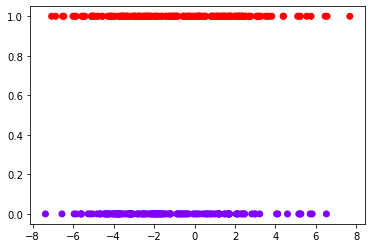

In [206]:
''' Plot of our variables '''
plt.scatter(X,y,c=y,cmap='rainbow')

In [207]:
''' Test train split '''
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 0)

In [208]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
''' GridSearchCV is a good way to find suitable parameters for Random Forest: max depth:2 and num_estmatprs:50 taken as suggested '''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc= RandomForestClassifier()
parameters= {
    'n_estimators':[5,10,50,100,250],
    'max_depth':[2,4,8,16,32,None]
}
cv = GridSearchCV(rfc, parameters,cv=5)
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [210]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
display(cv)

Best parameters are: {'max_depth': 2, 'n_estimators': 250}


0.619 + or -0.021 for the {'max_depth': 2, 'n_estimators': 5}
0.619 + or -0.037 for the {'max_depth': 2, 'n_estimators': 10}
0.615 + or -0.03 for the {'max_depth': 2, 'n_estimators': 50}
0.622 + or -0.022 for the {'max_depth': 2, 'n_estimators': 100}
0.625 + or -0.019 for the {'max_depth': 2, 'n_estimators': 250}
0.574 + or -0.043 for the {'max_depth': 4, 'n_estimators': 5}
0.615 + or -0.038 for the {'max_depth': 4, 'n_estimators': 10}
0.608 + or -0.041 for the {'max_depth': 4, 'n_estimators': 50}
0.605 + or -0.039 for the {'max_depth': 4, 'n_estimators': 100}
0.615 + or -0.031 for the {'max_depth': 4, 'n_estimators': 250}
0.57 + or -0.039 for the {'max_depth': 8, 'n_estimators': 5}
0.571 + or -0.064 for the {'max_depth': 8, 'n_estimators': 10}
0.591 + or -0.058 for the {'max_depth': 8, 'n_estimators': 50}
0.574 + or -0.043 for the {'max_depth': 8, 'n_estimators': 100}
0.574 + or -0.045 for the {'max_depth': 8, 'n_estimators'

In [211]:
#model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_scaled, y_train)
#model = RandomForestClassifier(n_estimators=20, random_state=0).fit(X_train_scaled, y_train)
model = RandomForestClassifier(n_estimators=50, max_depth = 2, random_state=0).fit(X_train_scaled, y_train)

In [212]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1])

In [213]:
print(y_pred_train.shape)
print(X_train_scaled.shape)
print(y_train.shape)
print(y_pred_train.reshape(-1,1).shape)
#train_acc = model.score(y_train, y_pred_train.reshape(-1,1))
#print("The Accuracy for Training Set is {}".format(train_acc*100)) # Expected 2D array, got 1D error 
#print(y_train.reshape(1,-1).shape) # series object has no attribute 'reshape'

(291,)
(291, 1)
(291,)
(291, 1)


In [214]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 64.26116838487972


In [215]:
y_pred = model.predict(X_test)
# print((y_test.shape))
# print((y_pred.shape))
# print(X_test.shape)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1])

In [216]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 54.794520547945204


In [217]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        33
           1       0.55      0.95      0.70        40

    accuracy                           0.55        73
   macro avg       0.53      0.51      0.40        73
weighted avg       0.53      0.55      0.43        73



Text(0.5, 33.0, 'Predicted Values')

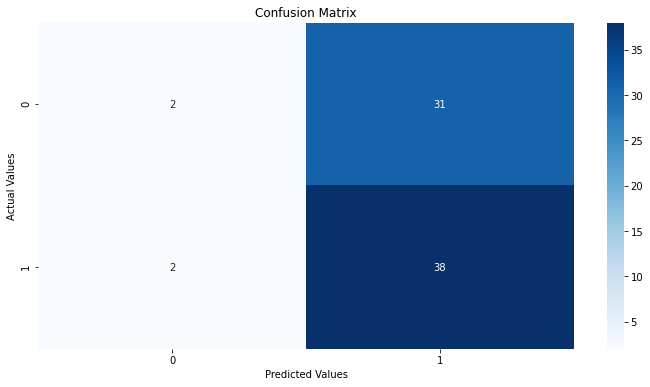

In [218]:
''' Confusion matrix for test dataset '''
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

# Probability calculation

In [219]:
''' This is the probability that we need I guess '''
probability = model.predict_proba(X).round(4)

In [220]:
deficit = model.predict_proba(X)[:,1].round(3)

In [221]:
surplus = model.predict_proba(X)[:,0].round(3)

In [222]:
final_without_NaN['probability'] = probability.tolist()
final_without_NaN

<ipython-input-222-7192b744a900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['probability'] = probability.tolist()


tmpc_past  tmpc_2017  temp_deviation         MW  y  \
month day                                                       
1     1     6.094742   0.086957       -6.007785     2.0625  1   
      2     5.930138   2.895833       -3.034305  67.854167  1   
      3     6.122764   2.312500       -3.810264 -29.041667  0   
      4     5.963877   5.914894       -0.048984  24.704545  1   
      5     5.203153   2.895833       -2.307320  21.729167  1   
...              ...        ...             ...        ... ..   
12    26    5.970844   7.166667        1.195823 -36.104167  0   
      27    5.890625   5.520833       -0.369792      -73.0  0   
      28    5.511792   4.645833       -0.865959 -32.541667  0   
      29    4.907018   5.958333        1.051316   4.583333  1   
      30    4.791777  10.604167        5.812389 -29.958333  0   

                probability  
month day                    
1     1    [0.4122, 0.5878]  
      2    [0.4122, 0.5878]  
      3    [0.4122, 0.5878]  
      4    [0.3587, 0.6413]  
      5    [0.4122, 0.5878]  
...                     ...  
12    26   [0.3459, 0.6541]  
      27   [0.4312, 0.5688]  
      28   [0.3337, 0.6663]  
      29   [0.3482, 0.6518]  
      30   [0.3639, 0.6361]  

[364 rows x 6 columns]

In [223]:
final_without_NaN.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 364 entries, (1, 1) to (12, 30)
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tmpc_past       364 non-null    float64
 1   tmpc_2017       364 non-null    float64
 2   temp_deviation  364 non-null    float64
 3   MW              364 non-null    Float64
 4   y               364 non-null    int32  
 5   probability     364 non-null    object 
dtypes: Float64(1), float64(3), int32(1), object(1)
memory usage: 18.5+ KB


In [224]:
final_without_NaN['surplus_probability'] = surplus.tolist()

<ipython-input-224-3bfa0ce9d1e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['surplus_probability'] = surplus.tolist()


In [225]:
final_without_NaN['deficit_probability'] = deficit.tolist()

<ipython-input-225-fe6cd5934cb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['deficit_probability'] = deficit.tolist()


In [226]:
final_without_NaN['result'] = np.where(final_without_NaN['surplus_probability'] > final_without_NaN['deficit_probability'], 'Surplus', 'Deficit')

<ipython-input-226-52e9e955485c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['result'] = np.where(final_without_NaN['surplus_probability'] > final_without_NaN['deficit_probability'], 'Surplus', 'Deficit')


In [227]:
#frame['HighScore'] = frame[['test1','test2','test3']].max(axis=1)
final_without_NaN['final_probability'] = final_without_NaN[['surplus_probability', 'deficit_probability']].max(axis=1)
final_without_NaN

<ipython-input-227-19e9ff72d847>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_without_NaN['final_probability'] = final_without_NaN[['surplus_probability', 'deficit_probability']].max(axis=1)


tmpc_past  tmpc_2017  temp_deviation         MW  y  \
month day                                                       
1     1     6.094742   0.086957       -6.007785     2.0625  1   
      2     5.930138   2.895833       -3.034305  67.854167  1   
      3     6.122764   2.312500       -3.810264 -29.041667  0   
      4     5.963877   5.914894       -0.048984  24.704545  1   
      5     5.203153   2.895833       -2.307320  21.729167  1   
...              ...        ...             ...        ... ..   
12    26    5.970844   7.166667        1.195823 -36.104167  0   
      27    5.890625   5.520833       -0.369792      -73.0  0   
      28    5.511792   4.645833       -0.865959 -32.541667  0   
      29    4.907018   5.958333        1.051316   4.583333  1   
      30    4.791777  10.604167        5.812389 -29.958333  0   

                probability  surplus_probability  deficit_probability  \
month day                                                               
1     1    [0.4122, 0.5878]                0.412                0.588   
      2    [0.4122, 0.5878]                0.412                0.588   
      3    [0.4122, 0.5878]                0.412                0.588   
      4    [0.3587, 0.6413]                0.359                0.641   
      5    [0.4122, 0.5878]                0.412                0.588   
...                     ...                  ...                  ...   
12    26   [0.3459, 0.6541]                0.346                0.654   
      27   [0.4312, 0.5688]                0.431                0.569   
      28   [0.3337, 0.6663]                0.334                0.666   
      29   [0.3482, 0.6518]                0.348                0.652   
      30   [0.3639, 0.6361]                0.364                0.636   

            result  final_probability  
month day                              
1     1    Deficit              0.588  
      2    Deficit              0.588  
      3    Deficit              0.588  
      4    Deficit              0.641  
      5    Deficit              0.588  
...            ...                ...  
12    26   Deficit              0.654  
      27   Deficit              0.569  
      28   Deficit              0.666  
      29   Deficit              0.652  
      30   Deficit              0.636  

[364 rows x 10 columns]

In [228]:
final_without_NaN.to_csv('Probability.csv')

In [229]:
data = pd.read_csv('Probability.csv')
data
''' Change to month name '''
import calendar
data['Month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,y,probability,surplus_probability,deficit_probability,result,final_probability,Month
0,1,1,6.094742,0.086957,-6.007785,2.062500,1,"[0.4122, 0.5878]",0.412,0.588,Deficit,0.588,Jan
1,1,2,5.930138,2.895833,-3.034305,67.854167,1,"[0.4122, 0.5878]",0.412,0.588,Deficit,0.588,Jan
2,1,3,6.122764,2.312500,-3.810264,-29.041667,0,"[0.4122, 0.5878]",0.412,0.588,Deficit,0.588,Jan
3,1,4,5.963877,5.914894,-0.048984,24.704545,1,"[0.3587, 0.6413]",0.359,0.641,Deficit,0.641,Jan
4,1,5,5.203153,2.895833,-2.307320,21.729167,1,"[0.4122, 0.5878]",0.412,0.588,Deficit,0.588,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,12,26,5.970844,7.166667,1.195823,-36.104167,0,"[0.3459, 0.6541]",0.346,0.654,Deficit,0.654,Dec
360,12,27,5.890625,5.520833,-0.369792,-73.000000,0,"[0.4312, 0.5688]",0.431,0.569,Deficit,0.569,Dec
361,12,28,5.511792,4.645833,-0.865959,-32.541667,0,"[0.3337, 0.6663]",0.334,0.666,Deficit,0.666,Dec
362,12,29,4.907018,5.958333,1.051316,4.583333,1,"[0.3482, 0.6518]",0.348,0.652,Deficit,0.652,Dec


In [230]:
data.to_csv('temp_con_deviation_data.csv')

In [231]:
model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [232]:
model.score(X,y)#.astype('int'))

0.5714285714285714

In [233]:
confusion_matrix(y, model.predict(X)) #.astype('int')

array([[  3, 147],
       [  9, 205]], dtype=int64)

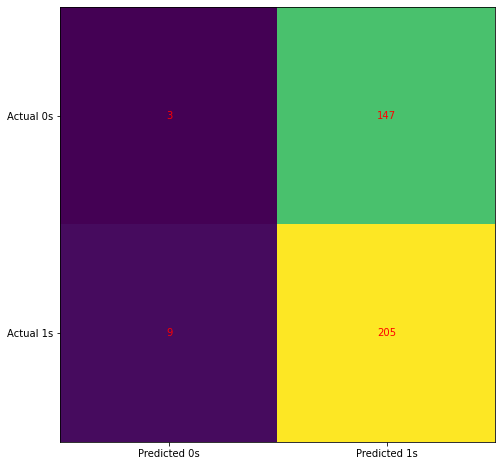

In [234]:
''' Confusion matrix for train dataset '''
cm = confusion_matrix(y.astype('int'), model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Probability for summer and winter seperately

# Summer

In [235]:
summer_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 121 to 303
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           183 non-null    int64  
 1   day             183 non-null    int64  
 2   tmpc_past       183 non-null    float64
 3   tmpc_2017       183 non-null    float64
 4   temp_deviation  183 non-null    float64
 5   MW              183 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 8.7 KB


In [236]:
summer_table['S/D category'] = np.where(summer_table['MW'] > 0, 1, 0) 
summer_table.head()

<ipython-input-236-231850fd6202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['S/D category'] = np.where(summer_table['MW'] > 0, 1, 0)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category
121,5,1,12.521560,9.304348,-3.217212,-18.562500,0
122,5,2,13.145253,9.791667,-3.353586,12.937500,1
123,5,3,13.057383,9.978723,-3.078659,-49.833333,0
124,5,4,13.350897,11.702128,-1.648770,35.583333,1
125,5,5,14.225310,10.437500,-3.787810,-0.416667,0


In [237]:
''' Change to month name '''
import calendar
summer_table['Month'] = summer_table['month'].apply(lambda x: calendar.month_abbr[x])
summer_table

<ipython-input-237-11b7892bac0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['Month'] = summer_table['month'].apply(lambda x: calendar.month_abbr[x])


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month
121,5,1,12.521560,9.304348,-3.217212,-18.562500,0,May
122,5,2,13.145253,9.791667,-3.353586,12.937500,1,May
123,5,3,13.057383,9.978723,-3.078659,-49.833333,0,May
124,5,4,13.350897,11.702128,-1.648770,35.583333,1,May
125,5,5,14.225310,10.437500,-3.787810,-0.416667,0,May
...,...,...,...,...,...,...,...,...
299,10,26,12.671723,15.083333,2.411610,0.458333,1,Oct
300,10,27,11.988347,11.479167,-0.509180,8.500000,1,Oct
301,10,28,11.235744,13.270833,2.035089,13.041667,1,Oct
302,10,29,11.320312,12.145833,0.825521,31.960000,1,Oct


In [238]:
# predictor values
feature_cols = ['temp_deviation']
X = summer_table[feature_cols]

# response variable
y = summer_table['S/D category']

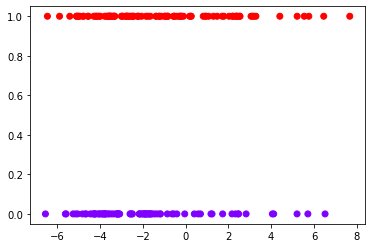

In [239]:
plt.scatter(X,y,c=y,cmap='rainbow')

In [240]:
''' Test train split '''
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [241]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [242]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_scaled, y_train)

In [243]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 56.849315068493155


In [244]:
y_pred = model.predict(X_test)

In [245]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 54.054054054054056


In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56        18
           1       0.56      0.47      0.51        19

    accuracy                           0.54        37
   macro avg       0.54      0.54      0.54        37
weighted avg       0.54      0.54      0.54        37



Text(0.5, 33.0, 'Predicted Values')

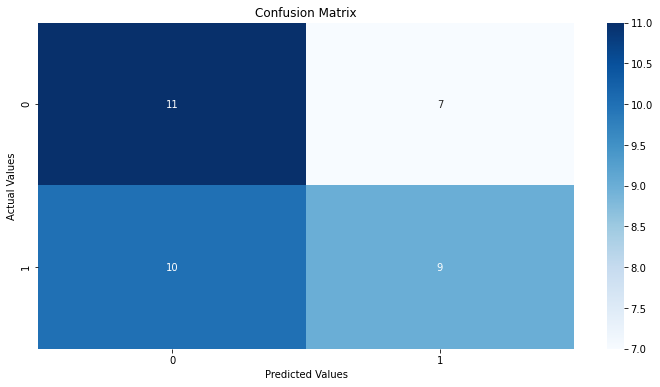

In [247]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

In [248]:
probability = model.predict_proba(X).round(4)

In [249]:
deficit = model.predict_proba(X)[:,1].round(3)

In [250]:
surplus = model.predict_proba(X)[:,0].round(3)

In [251]:
summer_table['probability'] = probability.tolist()

<ipython-input-251-062d4c1d274b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['probability'] = probability.tolist()


In [252]:
summer_table['surplus_probability'] = surplus.tolist()

<ipython-input-252-af2079e52c9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['surplus_probability'] = surplus.tolist()


In [253]:
summer_table['deficit_probability'] = deficit.tolist()

<ipython-input-253-b04aa64768af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['deficit_probability'] = deficit.tolist()


In [254]:
summer_table['result'] = np.where(summer_table['surplus_probability'] > summer_table['deficit_probability'], 'Surplus', 'Deficit')

<ipython-input-254-921e76e897b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['result'] = np.where(summer_table['surplus_probability'] > summer_table['deficit_probability'], 'Surplus', 'Deficit')


In [255]:
summer_table['final_probability'] = summer_table[['surplus_probability', 'deficit_probability']].max(axis=1)
summer_table

<ipython-input-255-9a74f8c1e370>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_table['final_probability'] = summer_table[['surplus_probability', 'deficit_probability']].max(axis=1)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,S/D category,Month,probability,surplus_probability,deficit_probability,result,final_probability
121,5,1,12.521560,9.304348,-3.217212,-18.562500,0,May,"[0.5796, 0.4204]",0.580,0.420,Surplus,0.580
122,5,2,13.145253,9.791667,-3.353586,12.937500,1,May,"[0.5854, 0.4146]",0.585,0.415,Surplus,0.585
123,5,3,13.057383,9.978723,-3.078659,-49.833333,0,May,"[0.5737, 0.4263]",0.574,0.426,Surplus,0.574
124,5,4,13.350897,11.702128,-1.648770,35.583333,1,May,"[0.5115, 0.4885]",0.512,0.488,Surplus,0.512
125,5,5,14.225310,10.437500,-3.787810,-0.416667,0,May,"[0.6038, 0.3962]",0.604,0.396,Surplus,0.604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10,26,12.671723,15.083333,2.411610,0.458333,1,Oct,"[0.3393, 0.6607]",0.339,0.661,Deficit,0.661
300,10,27,11.988347,11.479167,-0.509180,8.500000,1,Oct,"[0.4616, 0.5384]",0.462,0.538,Deficit,0.538
301,10,28,11.235744,13.270833,2.035089,13.041667,1,Oct,"[0.3543, 0.6457]",0.354,0.646,Deficit,0.646
302,10,29,11.320312,12.145833,0.825521,31.960000,1,Oct,"[0.4042, 0.5958]",0.404,0.596,Deficit,0.596


In [256]:
summer_table.to_csv('Probability_summer.csv')

In [257]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0])

In [258]:
model.score(X,y)#.astype('int'))

0.5846994535519126

In [259]:
confusion_matrix(y, model.predict(X)) #.astype('int')

array([[58, 24],
       [52, 49]], dtype=int64)

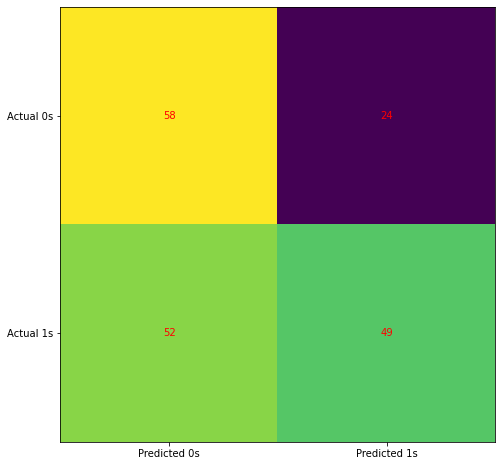

In [260]:
cm = confusion_matrix(y.astype('int'), model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Winter

In [261]:
winter_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 365
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           182 non-null    int64  
 1   day             182 non-null    int64  
 2   tmpc_past       182 non-null    float64
 3   tmpc_2017       180 non-null    float64
 4   temp_deviation  180 non-null    float64
 5   MW              181 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 10.0 KB


In [262]:
winter_table = winter_table.dropna()
winter_table

,month,day,tmpc_past,tmpc_2017,temp_deviation,MW
0,1,1,6.094742,0.086957,-6.007785,2.062500
1,1,2,5.930138,2.895833,-3.034305,67.854167
2,1,3,6.122764,2.312500,-3.810264,-29.041667
3,1,4,5.963877,5.914894,-0.048984,24.704545
4,1,5,5.203153,2.895833,-2.307320,21.729167
...,...,...,...,...,...,...
360,12,26,5.970844,7.166667,1.195823,-36.104167
361,12,27,5.890625,5.520833,-0.369792,-73.000000
362,12,28,5.511792,4.645833,-0.865959,-32.541667
363,12,29,4.907018,5.958333,1.051316,4.583333


In [263]:
''' Change to month name '''
import calendar
winter_table['Month'] = winter_table['month'].apply(lambda x: calendar.month_abbr[x])

<ipython-input-263-de72bd29e463>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['Month'] = winter_table['month'].apply(lambda x: calendar.month_abbr[x])


In [264]:
winter_table['S/D category'] = np.where(winter_table['MW'] > 0, 1, 0) 
winter_table.head()

<ipython-input-264-51dc026aabcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['S/D category'] = np.where(winter_table['MW'] > 0, 1, 0)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category
0,1,1,6.094742,0.086957,-6.007785,2.062500,Jan,1
1,1,2,5.930138,2.895833,-3.034305,67.854167,Jan,1
2,1,3,6.122764,2.312500,-3.810264,-29.041667,Jan,0
3,1,4,5.963877,5.914894,-0.048984,24.704545,Jan,1
4,1,5,5.203153,2.895833,-2.307320,21.729167,Jan,1


In [265]:
# predictor values
feature_cols = ['temp_deviation']
X = winter_table[feature_cols]

# response variable
y = winter_table['S/D category']

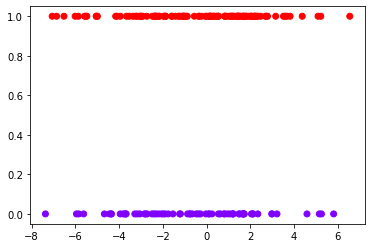

In [266]:
plt.scatter(X,y,c=y,cmap='rainbow')

In [267]:
''' Test train split '''
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [268]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [269]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train_scaled, y_train)

In [270]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 63.19444444444444


In [271]:
y_pred = model.predict(X_test)

In [272]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 55.55555555555556


In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.57      0.95      0.71        21

    accuracy                           0.56        36
   macro avg       0.29      0.48      0.36        36
weighted avg       0.33      0.56      0.42        36



Text(0.5, 33.0, 'Predicted Values')

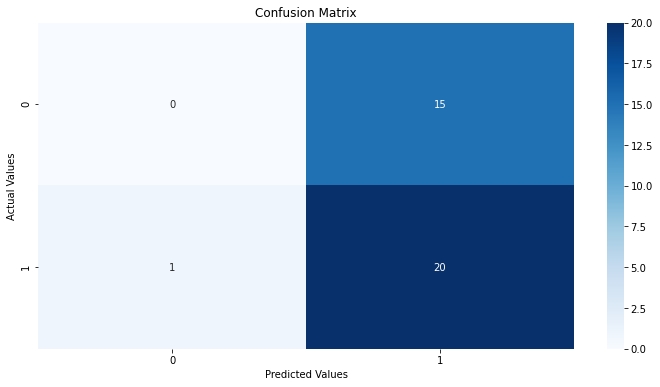

In [274]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
#plt.savefig('confusion_matrix.png')

In [275]:
probability = model.predict_proba(X).round(4)

In [276]:
deficit = model.predict_proba(X)[:,1].round(3)

In [277]:
surplus = model.predict_proba(X)[:,0].round(3)

In [278]:
winter_table['probability'] = probability.tolist()
winter_table

<ipython-input-278-2658522ebe34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['probability'] = probability.tolist()


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category,probability
0,1,1,6.094742,0.086957,-6.007785,2.062500,Jan,1,"[0.5004, 0.4996]"
1,1,2,5.930138,2.895833,-3.034305,67.854167,Jan,1,"[0.4355, 0.5645]"
2,1,3,6.122764,2.312500,-3.810264,-29.041667,Jan,0,"[0.4523, 0.5477]"
3,1,4,5.963877,5.914894,-0.048984,24.704545,Jan,1,"[0.3725, 0.6275]"
4,1,5,5.203153,2.895833,-2.307320,21.729167,Jan,1,"[0.4199, 0.5801]"
...,...,...,...,...,...,...,...,...,...
360,12,26,5.970844,7.166667,1.195823,-36.104167,Dec,0,"[0.3473, 0.6527]"
361,12,27,5.890625,5.520833,-0.369792,-73.000000,Dec,0,"[0.3791, 0.6209]"
362,12,28,5.511792,4.645833,-0.865959,-32.541667,Dec,0,"[0.3894, 0.6106]"
363,12,29,4.907018,5.958333,1.051316,4.583333,Dec,1,"[0.3502, 0.6498]"


In [279]:
winter_table['surplus_probability'] = surplus.tolist()

<ipython-input-279-9b4eda97a9b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['surplus_probability'] = surplus.tolist()


In [280]:
winter_table['deficit_probability'] = deficit.tolist()

<ipython-input-280-ca3a5faf9a71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['deficit_probability'] = deficit.tolist()


In [281]:
winter_table['result'] = np.where(winter_table['surplus_probability'] > winter_table['deficit_probability'], 'Surplus', 'Deficit')

<ipython-input-281-325b21ecfa2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['result'] = np.where(winter_table['surplus_probability'] > winter_table['deficit_probability'], 'Surplus', 'Deficit')


In [282]:
winter_table['final_probability'] = winter_table[['surplus_probability', 'deficit_probability']].max(axis=1)
winter_table

<ipython-input-282-39ab94830320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_table['final_probability'] = winter_table[['surplus_probability', 'deficit_probability']].max(axis=1)


,month,day,tmpc_past,tmpc_2017,temp_deviation,MW,Month,S/D category,probability,surplus_probability,deficit_probability,result,final_probability
0,1,1,6.094742,0.086957,-6.007785,2.062500,Jan,1,"[0.5004, 0.4996]",0.500,0.500,Deficit,0.500
1,1,2,5.930138,2.895833,-3.034305,67.854167,Jan,1,"[0.4355, 0.5645]",0.435,0.565,Deficit,0.565
2,1,3,6.122764,2.312500,-3.810264,-29.041667,Jan,0,"[0.4523, 0.5477]",0.452,0.548,Deficit,0.548
3,1,4,5.963877,5.914894,-0.048984,24.704545,Jan,1,"[0.3725, 0.6275]",0.372,0.628,Deficit,0.628
4,1,5,5.203153,2.895833,-2.307320,21.729167,Jan,1,"[0.4199, 0.5801]",0.420,0.580,Deficit,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12,26,5.970844,7.166667,1.195823,-36.104167,Dec,0,"[0.3473, 0.6527]",0.347,0.653,Deficit,0.653
361,12,27,5.890625,5.520833,-0.369792,-73.000000,Dec,0,"[0.3791, 0.6209]",0.379,0.621,Deficit,0.621
362,12,28,5.511792,4.645833,-0.865959,-32.541667,Dec,0,"[0.3894, 0.6106]",0.389,0.611,Deficit,0.611
363,12,29,4.907018,5.958333,1.051316,4.583333,Dec,1,"[0.3502, 0.6498]",0.350,0.650,Deficit,0.650


In [283]:
winter_table.to_csv('Probability_winter.csv')

In [284]:
model.predict(X)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [285]:
model.score(X,y)#.astype('int'))

0.6055555555555555

In [286]:
confusion_matrix(y, model.predict(X)) #.astype('int')

array([[  1,  67],
       [  4, 108]], dtype=int64)

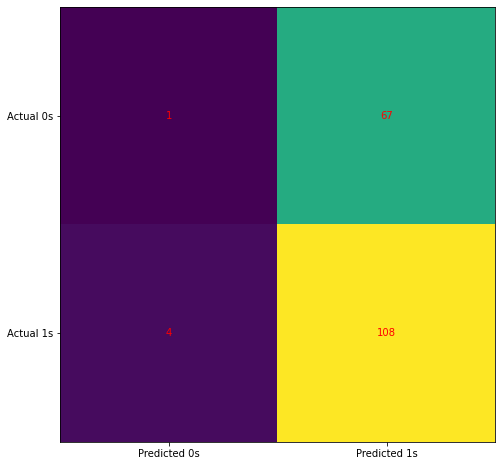

In [287]:
cm = confusion_matrix(y.astype('int'), model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()